# PFIELD3 3-D RMS acoustic pressure field of a planar 2-D array

## Syntax
    
1. RP, SPECT, idx = PFIELD3(X,Y,Z,DELAYS,PARAM) returns the three-dimensional radiation pattern of a planar 2-D array whose elements are excited at different time delays (given by the vector DELAYS). The radiation pattern RP is given in terms of the root-mean-square (RMS) of acoustic pressure. The characteristics of the array and transmission must be given in the structure PARAM. The x- and y-coordinates of the elements must be in PARAM.elements (see below for details). The radiation pattern is calculated at the points specified by (X,Y,Z).

Use PFIELD for uniform linear or convex arrays.

--- Try it: enter "pfield3" in the command window for an example ---

Units: X,Y,Z must be in m; DELAYS must be in s.

DELAYS can be a matrix. This syntax can be used to simulate MPT
(multi-plane transmit) sequences, for example. In this case, each ROW
represents a delay series. For example, to create a 3-MPT sequence with
a 1024-element matrix array, the DELAYS matrix must have 3 rows and
1024 columns (size = [3 1024]).

Note: Use TXDELAY3 to create standard delays (focus point, focus line,
    plane waves, diverging waves) with a matrix array.

PFIELD3 is called by SIMUS3 to simulate ultrasound RF radio-frequency
signals generated by a planar 2-D array.

---
> NOTE #1: X-, Y-, and Z-axes
Conventional axes are used:
The X-axis is PARALLEL to the transducer and points from the first
(leftmost) element to the last (rightmost) element (X = 0 at the CENTER
of the transducer). The Z-axis is PERPENDICULAR to the transducer and
points downward (Z = 0 at the level of the transducer, Z increases as
depth increases). The Y-axis is such that the coordinates are
right-handed.
---
> NOTE #2: Simplified method: Directivity
By default, the calculation is made faster by assuming that the
directivity of the elements is dependent only on the central frequency.
This simplification very little affects the pressure field in most
situations (except near the array). To turn off this option, use
OPTIONS.FullFrequencyDirectivity = true.
(see ADVANCED OPTIONS below).
---
> NOTE #3: Present version of PFIELD3
The present version of PFIELD3 only considers planar 2-D array whose
z-coordinates of the elements are 0. All the elements are rectangular
and have equal width and height.
---

PARAM is a structure that contains the following fields:
---
    *** TRANSDUCER PROPERTIES ***
1)  PARAM.fc: central frequency (in Hz, REQUIRED)<br>
2)  PARAM.elements: x- and y-coordinates of the element centers
        (in m, REQUIRED). It MUST be a two-row matrix, with the 1st
        and 2nd rows containing the x and y coordinates, respectively. <br>
3)  PARAM.width: element width, in the x-direction (in m, REQUIRED)<br>
4)  PARAM.height: element height, in the y-direction (in m, REQUIRED)<br>
5)  PARAM.bandwidth: pulse-echo 6dB fractional bandwidth (in %)
        The default is 75%.<br>
6)  PARAM.baffle: property of the baffle:
        'soft' (default), 'rigid', or a scalar > 0.
        See "Note on BAFFLE properties" below for details<br>

    `*** MEDIUM PARAMETERS ***`
7)  PARAM.c: longitudinal velocity (in m/s, default = 1540 m/s)<br>
8)  PARAM.attenuation: attenuation coefficient (dB/cm/MHz, default: 0)
        Notes: A linear frequency-dependence is assumed.
                A typical value for soft tissues is ~0.5 dB/cm/MHz.<br>

    `*** TRANSMIT PARAMETERS ***`
9)  PARAM.TXapodization: transmit apodization (default: no apodization)<br>
10) PARAM.TXnow: number of wavelengths of the TX pulse (default: 1)<br>
11) PARAM.TXfreqsweep: frequency sweep for a linear chirp (default: [])
                        To be used to simulate a linear TX down-chirp.<br>

Other syntaxes:
--------------
i)  [RP,PARAM] = PFIELD3(...) also returns the complete list of
    parameters including the default values.<br>
ii) [...] = PFIELD3 without any input argument runs an example of a
    focused acoustic field generated by a 3.5 MHz matrix array.


Note on CHIRP signals:
---------------------
Linear chirps are characterized by PARAM.TXnow, PARAM.fc and
PARAM.TXfreqsweep. The transmitted pulse has a duration of
approximately T (= PARAM.TXnow/PARAM.fc), with the amplitude and phase
defined over the time interval -T/2 to +T/2. The total frequency sweep
is DeltaF (= PARAM.TXfreqsweep): the frequencies changes linearly from
(PARAM.fc + DeltaF/2) to (PARAM.fc - DeltaF/2) in the defined time
interval.


Note on BAFFLE property:
-----------------------
In PFIELD3, it is assumed by default that the array elements are
embedded in an infinite SOFT baffle. To modify the property of the
baffle, modify the field PARAM.baffle:<br>
    1) 'rigid'<br>
    2) 'soft' (this is the default)<br>
    3) a nonnegative scalar Alpha,
        with Alpha = (medium impedance)/(baffle impedance)
        Note: Alpha = 0 => 'rigid'; Alpha >> 1 => 'soft'

The baffle property affects the obliquity factor included in the
directivity of the elements. This obliquity factor is not 1 if the
baffle is not rigid. A general case (see case #3 below) can be chosen
by specifying an impedance ratio. For details, refer to the
corresponding papers.<br>
1) For a rigid baffle => obliquity factor = 1.<br>
2) For a soft baffle => obliquity factor = cos(Theta).
    Selfridge et al. Appl Phys Lett 37(1), 35-36 (1980)
    "A theory for the radiation pattern of a narrow-strip acoustic
    transducer." <a
    href="matlab:web('http://scitation.aip.org/content/aip/journal/apl/37/1/10.1063/1.91692')">Paper here</a><br>
3) General baffle => obliquity factor = cos(Theta)/(cos(Theta)+Alpha)
    with Alpha = (medium impedance)/(baffle impedance).
    Pesqu� et al. IEEE Ultrasonics Symposium, (1984)
    "Effect of the planar baffle impedance in acoustic radiation of a
    phased array element theory and experimentation." <a
    href="matlab:web('http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=1535402')">Paper here</a>
    Example: For a baffle of impedance 2.8 MRayl (epoxy) adjacent to
            soft tissues of impedance 1.6 MRayls, alpha = 0.57.


ADVANCED OPTIONS:
---
---
    %-- FREQUENCY SAMPLES --%
1)  Only frequency components of the transmitted signal in the range
    [0,2fc] with significant amplitude are considered. The default
    relative amplitude is -60 dB in PFIELD. You can change this value
    by using the following:
        [...] = PFIELD(...,OPTIONS),
    where OPTIONS.dBThresh is the threshold in dB (default = -60).
---
    %-- FULL-FREQUENCY DIRECTIVITY --%
2)  By default, the directivity of the elements depends on the center
    frequency only. This makes the algorithm faster. To make the
    directivities fully frequency-dependent, use: 
        [...] = PFIELD(...,OPTIONS),
    with OPTIONS.FullFrequencyDirectivity = true (default = false).
---
    %-- ELEMENT SPLITTING --%
3)  Each transducer element of the array is split into small rectangles.
    The width and height and of these small rectangles must be small
    enough to ensure that the far-field model is accurate. By default,
    the elements are split into M-by-N rectangles, with M and N being
    defined by:<br>
        M = ceil(element_width/smallest_wavelength);<br>
        N = ceil(element_height/smallest_wavelength);<br>
    To modify the number MN of subelements by splitting, you may adjust
    OPTIONS.ElementSplitting, which must contain two elements. For
    example, OPTIONS.ElementSplitting = [1 3].
---
    %-- WAIT BAR --%
4)  If OPTIONS.WaitBar is true, a wait bar appears (only if the number
    of frequency samples >10). Default is true.
---


Notes regarding the model & REFERENCES:
--------------------------------------
1) PFIELD3 works for planar 2-D arrays. It considers arrays that have
    identical rectangular elements on the z=0 plane. Each element is
    split into small rectangles (if required). As the sub-elements are
    small enough, the three-dimensional radiation patterns are derived
    by using Fraunhofer (far-field) equations.
2) The paper that describes the first 2-D version of PFIELD is:
    SHAHRIARI S, GARCIA D. Meshfree simulations of ultrasound vector
    flow imaging using smoothed particle hydrodynamics. Phys Med Biol,
    2018;63:205011. <a
    href="matlab:web('https://www.biomecardio.com/publis/physmedbio18.pdf')">PDF here</a>
3) The papers that describe the theory and validation of the 2-D + 3-D
    versions of PFIELD and SIMUS are:<br>
    i)  GARCIA D. SIMUS: an open-source simulator for medical ultrasound
        imaging. Part I: theory & examples. Comput Methods Programs
        Biomed, 2022;218:106726. <a
        href="matlab:web('https://www.biomecardio.com/publis/cmpb22.pdf')">PDF here</a><br>
    ii) CIGIER A, VARRAY F, GARCIA D. SIMUS: an open-source simulator
        for medical ultrasound imaging. Part II:comparison with four
        simulators. Comput Methods Programs Biomed, 2022;220:106774.
        <a href="matlab:web('https://www.biomecardio.com/publis/cmpb22a.pdf')">PDF here</a><br>
4) Use the fonction <a href="matlab:cite")>CITE</a> to guide you in citations.
5) There is yet no publication for PFIELD3 (it is planned for 2023-24).

In [28]:
import pymust, numpy as np, matplotlib.pyplot as plt
import copy
import matplotlib

In [29]:
# Utility functions to plot the results
def slice_plot(xi:np.ndarray, yi:np.ndarray, zi:np.ndarray, P:np.ndarray, YZ:np.ndarray|list = [], XZ:np.ndarray|list = [], XY:np.ndarray|list = [], long_output:bool = False) -> tuple[plt.Figure, plt.Axes] | tuple[plt.Figure, plt.Axes, dict]:
    """
    Matplotlib adaptation of the slice function from the MATLAB
    
    Parameters:
    -----------
    xi : 3D array
        x-coordinates of the grid
    yi : 3D array
        y-coordinates of the grid
    zi : 3D array
        z-coordinates of the grid
    P : 3D array
        Pressure field
    YZ : list, optional (xslice on MATLAB)
        X-coordinates of the slices
    XZ : list, optional (yslice on MATLAB)
        Y-coordinates of the slices
    XY : list, optional (zslice on MATLAB)
        Z-coordinates of the slices
    long_output : bool, optional
        If False, returns only the figure and the axis (default)
        If True, returns the figure, axis and the dictionary of surfaces
    _________________________________________________________________________
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cm = matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(-20, 0), 'hot')
    
    total_max = np.max(P)
    
    surf_dict = {}
    
    for slice_axis, var in zip([YZ, XZ, XY], ["YZ", "XZ", "XY"]):
        if not hasattr(slice_axis, '__iter__'): #check if slice_axis is (not) iterable
            slice_axis = np.array([slice_axis])
        else:
            slice_axis = np.array(slice_axis)
        
        if var == "YZ":
            plane = xi
            shape = xi.shape[::2]
        elif var == "XZ":
            plane = yi
            shape = yi.shape[1:]
        else:
            plane = zi
            shape = zi.shape[:-1]
        
        for i,value in enumerate(slice_axis):
            var_i = var + str(i)
            difference = np.abs(plane - value)
            index = np.unravel_index(np.argmin(difference, axis=None), difference.shape)
            indices_slice = np.where(plane == plane[index])
            
            P_slice = P[indices_slice].reshape(shape)
            xi_slice = xi[indices_slice].reshape(shape)
            yi_slice = yi[indices_slice].reshape(shape)
            zi_slice = zi[indices_slice].reshape(shape)
            
            # color = cm.to_rgba(20*np.log10(P_slice/np.max(P_slice)))
            color = cm.to_rgba(20*np.log10(P_slice/total_max))
            # color[:, :, 3] = .25 # DR: does this change the transparency?
            surf_dict[var_i] = ax.plot_surface(xi_slice*1e3, yi_slice*1e3, zi_slice*1e3, rstride=1, cstride=1, facecolors=color, antialiased=True,alpha = 0.75, linewidth=0)
        
    if not long_output:
        return fig, ax
    else: 
        return fig, ax, surf_dict
    
def single_slice_plot(xi:np.ndarray, yi:np.ndarray,   zi:np.ndarray,
                      P:np.ndarray,  plane_label:str, value:float|int,
                      x0:float|int,  y0:float|int,    z0:float|int,
                      xe:np.ndarray, ye:np.ndarray,   ze:np.ndarray,
                      fig:plt.Figure=None, ax:plt.Axes=None) -> tuple[plt.Figure, plt.Axes]:
    """
    Plots a single slice of the 3D pressure field on a specified plane.
    
    Parameters:
    -----------
    xi, yi, zi : ndarray
        3D arrays representing the coordinates of the grid points.
    P : ndarray
        3D array representing the pressure field.
    plane_label : str
        Label of the plane to plot ('YZ', 'XZ', or 'XY').
    value : float
        The value at which to slice the plane.
    x0, y0, z0 : float
        Coordinates of the focus point.
    xe, ye, ze : ndarray
        Coordinates of the elements.
    fig : Figure, optional
        Figure object to plot on. If None, a new figure is created.
    ax : Axes, optional
        Axes object to plot on. If None, a new axes is created.
    _________________________________________________________________________
    """
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    if plane_label == "YZ":
        plane = xi
        shape = xi.shape[::2]
        extent = [yi[0,0,0]*1e2, yi[-1,-1,-1]*1e2, zi[0,0,0]*1e2, zi[-1,-1,-1]*1e2]
    elif plane_label == "XZ":
        plane = yi
        shape = yi.shape[1:]
        extent = [xi[0,0,0]*1e2, xi[-1,-1,-1]*1e2, zi[0,0,0]*1e2, zi[-1,-1,-1]*1e2]
    elif plane_label == "XY":
        plane = zi
        shape = zi.shape[:-1]
        extent = [xi[0,0,0]*1e2, xi[-1,-1,-1]*1e2, yi[0,0,0]*1e2, yi[-1,-1,-1]*1e2]
    else:
        raise ValueError("plane_label must be 'YZ', 'XZ' or 'XY'")

    difference = np.abs(plane - value)
    index = np.unravel_index(np.argmin(difference, axis=None), difference.shape)

    indices_slice = np.where(plane == plane[index])
    P_slice = P[indices_slice].reshape(shape).T

    cax = ax.imshow(20*np.log10(P_slice/np.max(P_slice)), origin="lower", cmap='hot', extent=extent, aspect='auto')
    fig.colorbar(cax, ax=ax)
    cax.set_clim(-20, 0)
    
    nl = "\n"
    ax.set_title(f'Focused wave - RMS pressure field{nl}at {plane_label} plane, {plane_label} = {plane[indices_slice][0]*1e2:.2f} cm')
    ax.axis("equal")

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    aspect = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])
    ax.set_box_aspect(aspect)

    if plane_label == "YZ":
        if value == x0:
            ax.scatter(y0*1e2, z0*1e2, c='b', label='focus point')
        if value >= xe.min() and value <= xe.max():
            ax.scatter(ye*1e2, ze*1e2,c='m', label='elements')
        ax.set_xlabel('y [cm]')
        ax.set_ylabel('z [cm]')
    if plane_label == "XZ":
        if value == y0:
            ax.scatter(x0*1e2, z0*1e2, c='b', label='focus point')
        if value >= ye.min() and value <= ye.max():
            ax.scatter(xe*1e2, ze*1e2, c='m', label='elements')
        ax.set_xlabel('x [cm]')
        ax.set_ylabel('z [cm]')
    if plane_label == "XY" and value == z0:
        ax.scatter(x0*1e2, y0*1e2, c='b', label='focus point')
        ax.set_xlabel('x [cm]')
        ax.set_ylabel('y [cm]')
    
    if ax.get_legend_handles_labels()[1]:
        ax.legend()
    return fig, ax

# Example #1: Generate a focused pressure field with a matrix array 3-MHz matrix array with 32x32 elements

This example shows how to generate a focused pressure field with a phased-array transducer.


<details>
<summary><code>MATLAB</code> code <i>(Hidden)</i></summary>

```MATLAB
param.fc = 3e6;
param.bandwidth = 70;
param.width = 250e-6;
param.height = 250e-6;

% position of the elements (pitch = 300 microns)
pitch = 300e-6;
[xe,ye] = meshgrid(((1:32)-16.5)*pitch);
param.elements = [xe(:).'; ye(:).'];

% Focus position
x0 = 0; y0 = -2e-3; z0 = 30e-3;

% Transmit time delays:
dels = txdelay3(x0,y0,z0,param);

% 3-D grid
n = 32;
[xi,yi,zi] = meshgrid(linspace(-5e-3,5e-3,n),linspace(-5e-3,5e-3,n),...
    linspace(0,6e-2,4*n));
% RMS pressure field
RP = pfield3(xi,yi,zi,dels,param);

% Display the pressure field
slice(xi*1e2,yi*1e2,zi*1e2,20*log10(RP/max(RP(:))),...
    x0*1e2,y0*1e2,z0*1e2)
shading flat
colormap(hot), caxis([-20 0])
set(gca,'zdir','reverse'), axis equal
alpha color % some transparency
c = colorbar; c.YTickLabel{end} = '0 dB';
zlabel('[cm]')

```

</details>

In [30]:
# Create a custom 3-MHz 32x32-elements phased array in a structure param.
param = pymust.utils.Param()
param.fc = 3e6
param.bandwidth = 70
param.width = 250e-6
param.height = 250e-6
param.radius = np.inf

# position of the elements (pitch = 300 microns)
pitch = 300e-6
param.pitch = pitch
xe,ye = np.meshgrid((np.arange(1,33)-16.5)*pitch, (np.arange(1,33)-16.5)*pitch, indexing='ij')
ze = np.zeros(xe.shape)
param.elements = np.array([xe.flatten(order="F"),ye.flatten(order="F")])
param.Nelements = param.elements.shape[1]

# Focus position
x0 = 0; y0 = -2e-3; z0 = 30e-3


Obtain the corresponding transmit time delays (in s).


In [31]:
# Transmit time delays:
txdel3 = pymust.txdelay3(x0,y0,z0,param) # in s


Simulate the pressure field by using PFIELD.

First define an image grid.



The function PFIELD yields the root-mean-square (RMS) pressure field.



In [32]:
# 3-D grid
n = 32
yi,xi,zi = np.meshgrid(np.linspace(-5e-3,5e-3,n),np.linspace(-5e-3,5e-3,n),np.linspace(0,6e-2,4*n))
P, _, _ = pymust.pfield3(xi, yi, zi, txdel3,param)

Display the acoustic pressure field.



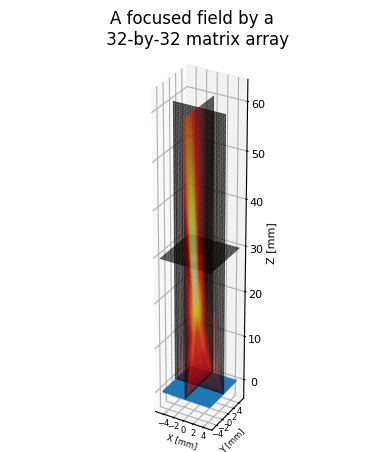

In [33]:
fig, ax = slice_plot(xi, yi, zi,P, YZ=0, XZ=0, XY=30e-3)
# ax.set_xlim([-5, 5])
# ax.set_ylim([-5, 5])
# ax.set_zlim([0, 60])
ax.set_xlabel('X [mm]', labelpad=-12, fontsize=6)
ax.set_ylabel('Y [mm]', labelpad=-9, fontsize=6)
ax.set_zlabel('Z [mm]', labelpad=18, fontsize=8)
ax.set_title('A focused field by a \n 32-by-32 matrix array', pad=20)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()
aspect = [(xlim[1] - xlim[0]), (ylim[1] - ylim[0]), (zlim[1] - zlim[0])] # aspect = [1,1,6]
ax.set_box_aspect(aspect)  # Aspect ratio is 10:10:60 (x:y:z) 

# Increase image resolution (optional)
# fig.set_dpi(400); fig.set_size_inches(10, 10)

# ax.invert_zaxis() # Invert z-axis (optional)

# Modify tick size
for axe in ['x', 'y']:
    ax.tick_params(axis=axe, which='major', labelsize=6, pad=-6)
    
ax.tick_params(axis='z', which='major', labelsize=8, pad=8)


plt.scatter(xe*1e3, ye*1e3, marker='o',s=1)
plt.show()

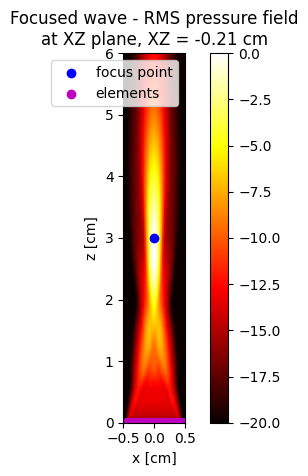

In [34]:
plane_label = "XZ"
value = y0
fig,ax = single_slice_plot(xi, yi, zi, P, plane_label, value, x0, y0, z0, xe, ye, ze) 
plt.show()

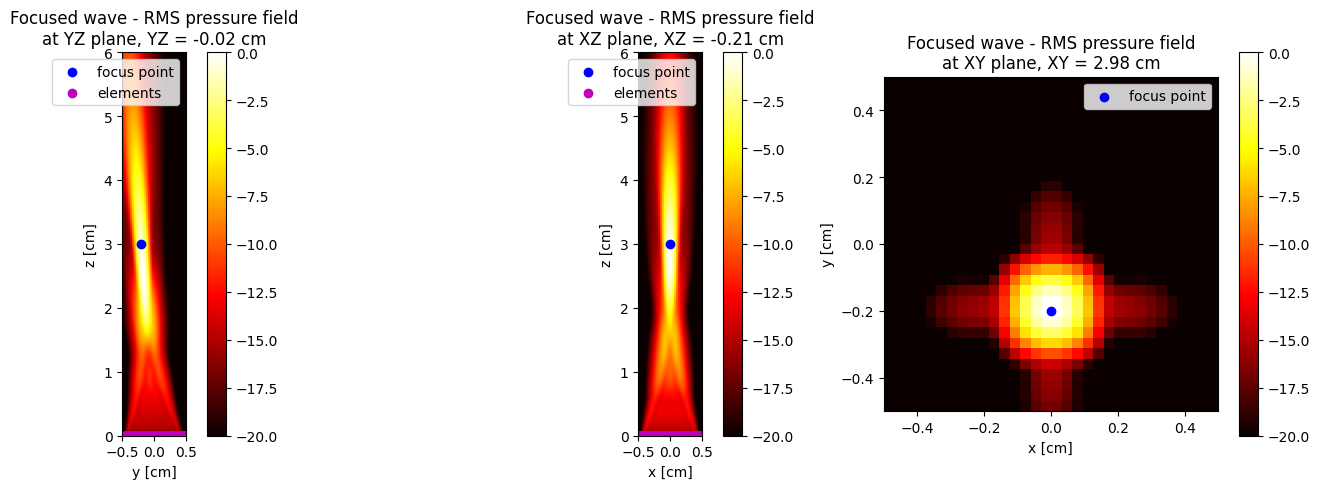

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="tight")
axs = axs.flatten()
i = 0
for plane_label, value in zip(["YZ", "XZ", "XY"], [x0, y0, z0]):
    ax = axs[i]
    fig, ax = single_slice_plot(xi, yi, zi, P, plane_label, value, x0, y0, z0, xe, ye, ze, fig, ax)
    i += 1
plt.show()

# Example #2: Comparison of pfield and pfield3
## 3-D focused pressure field with a cardiac phased-array 

This example shows how to generate a 3-D focused pressure field with a phased-array transducer.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [58]:
param = pymust.getparam('P4-2v')
param3 = copy.deepcopy(param)

options = pymust.utils.Options()

options.dBThresh = -20
options.ElementSplitting = 1
options.FullFrequencyDirectivity = False
options.FrequencyStep = 1.5
options.ElementSplitting = [1,1] # Avoid element splitting



Choose a focus location at xf = 2 cm, zf = 5 cm.


In [59]:
xf = -2e-2
zf = 5e-2 # focus position (in m)
yf = 0

In [60]:
# Define the element positions 
# (a 64x1 array with a pitch of 300 microns, equivalent to a 64-element linear array)
pitch = 300e-6
param3.pitch = pitch
Nelements = param3.Nelements + 1
xe = (np.arange(1,Nelements)-Nelements/2)*pitch
ye = np.zeros(xe.shape); ze = np.zeros(xe.shape)
param3.elements = np.array([xe,ye])

In [61]:
# Confirm both elements are equivalent
xe,ze,_,_ = param.getElementPositions()
elements = np.array([xe,ze]).squeeze()
print(f"{(param3.elements == elements).all() = }")


(param3.elements == elements).all() = np.True_



Obtain the corresponding transmit time delays (in s).


In [62]:
txdel = pymust.txdelay(xf,zf,param) # in s
txdel3 = pymust.txdelay3(xf,yf,zf,param3) # in s

Simulate the pressure field by using PFIELD.

In [63]:
# First define the x-, y-, z-coordinates:
x = np.linspace(-4e-2,4e-2,51)
y = np.linspace(-0.75,.75,51)*param.height
z = np.linspace(0,10e-2,51)

# Obtain the RMS pressure field on the azimuthal plane:
xaz,zaz = np.meshgrid(x,z)
yaz = np.zeros(xaz.shape)
Paz, RSPECT, _ = pymust.pfield(xaz,yaz,zaz,txdel,param)

# Obtain the RMS pressure field on the elevation plane:
yel,zel = np.meshgrid(y,z)
xel = np.ones(yel.shape)*xf
Pel, _, _ = pymust.pfield(xel,yel,zel,txdel,param)

# Obtain the RMS pressure field on the focal plane:
xfo,yfo = np.meshgrid(x,y)
zfo = np.ones(xfo.shape)*zf
Pfo, _ , _ = pymust.pfield(xfo,yfo,zfo,txdel,param)

Display the acoustic pressure field.


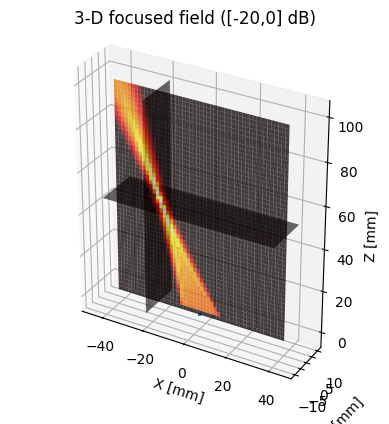

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cm = matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(-20, 0), 'hot')

color = cm.to_rgba(20*np.log10(Paz.T/np.max(Paz)))
color[:, :, 3] = .15
# surf1 = ax.plot_surface(xaz*1e3, yaz*1e3, zaz*1e3, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05)
surf1 = ax.plot_surface(xaz*1e3, yaz*1e3, zaz*1e3, rstride=1, cstride=1, facecolors=color, antialiased=True,alpha = 0.75, linewidth=0)

color = cm.to_rgba(20*np.log10(Pel.T/np.max(Pel)))
color[:, :, 3] = .15
# surf2 = ax.plot_surface(xel*1e3,yel*1e3,zel*1e3, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05)
surf2 = ax.plot_surface(xel*1e3,yel*1e3,zel*1e3, rstride=1, cstride=1, facecolors=color, antialiased=True,alpha = 0.75, linewidth=0)

color = cm.to_rgba(20*np.log10(Pfo.T/np.max(Pfo)))
color[:, :, 3] = .15
# surf3 = ax.plot_surface(xfo*1e3,yfo*1e3,zfo*1e3, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05,)
surf3 = ax.plot_surface(xfo*1e3,yfo*1e3,zfo*1e3, rstride=1, cstride=1, facecolors=color, antialiased=True,alpha = 0.75, linewidth=0)

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()
aspect = [(xlim[1] - xlim[0]), (ylim[1] - ylim[0]), (zlim[1] - zlim[0])]
ax.set_box_aspect(aspect) 

ax.scatter(xe, ye, marker='o',s=1)

plt.axis("equal")
ax.set_title('3-D focused field ([-20,0] dB)')
plt.show()

In [65]:
yi,xi,zi = np.meshgrid(y,x,z,indexing='ij')
P, _, _  = pymust.pfield3(xi, yi, zi, txdel3,param3, options = options)

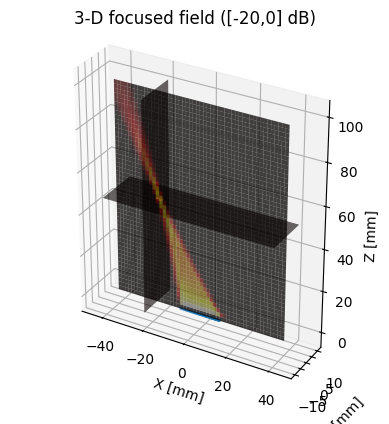

In [66]:
fig, ax = slice_plot(xi, yi, zi,P, YZ=xf, XZ=yf, XY=zf)
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()
aspect = [(xlim[1] - xlim[0]), (ylim[1] - ylim[0]), (zlim[1] - zlim[0])]
ax.set_box_aspect(aspect) 

ax.scatter(xe*1e3, ye*1e3, marker='o',s=1)

ax.axis("equal")
ax.set_title('3-D focused field ([-20,0] dB)')
plt.show()

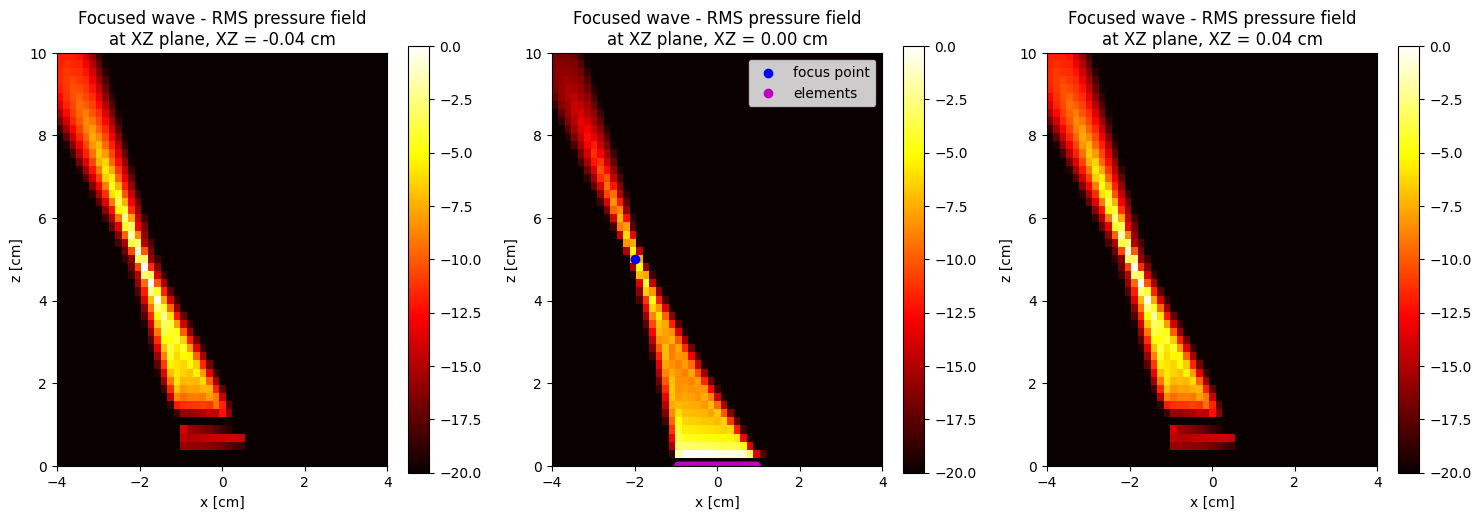

In [67]:
# Comparison of different slices of the XZ plane
fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="tight")
y_vals = yi[:,0,0]
for i,ax in enumerate(axs):
    fig, ax = single_slice_plot(xi, yi, zi, P, "XZ", y_vals[-2-int(len(y_vals)/2)+i], xf, yf, zf, xe, ye, ze, fig, ax)
plt.show()

# DR: some artifacts are due to the "inhibiton" of automatic element splitting

[]

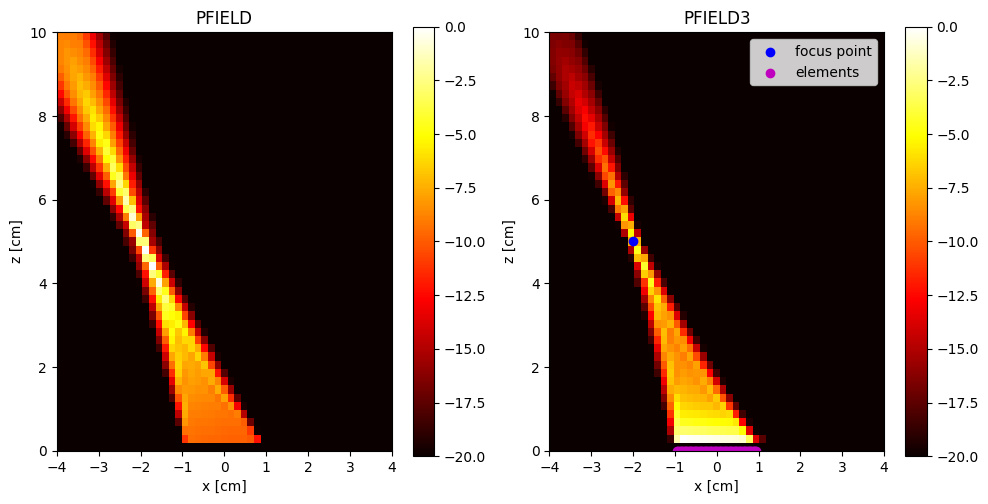

In [68]:
fig, axs = plt.subplots(1,2, figsize=(10,5), layout="tight")
ax = axs[0]
cax = ax.imshow(20*np.log10(Paz.T/np.max(Paz)), origin="lower", cmap='hot', aspect='auto', extent=[x[0]*1e2, x[-1]*1e2, z[0]*1e2, z[-1]*1e2])
ax.axis("equal")
fig.colorbar(cax, ax=ax)
cax.set_clim(-20, 0)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
aspect = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])
ax.set_box_aspect(aspect)
ax.set_xlabel('x [cm]')
ax.set_ylabel('z [cm]')
ax.set_title('PFIELD')

fig, axs[1] = single_slice_plot(xi, yi, zi, P, "XZ", y_vals[-1-int(len(y_vals)/2)], xf, yf, zf, xe, ye, ze, fig, axs[1])
axs[1].set_title('PFIELD3')
plt.plot()